# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

**Yuanhao Zhu** A13626824 yuz587@ucsd.edu

**Jinwei Ren** A92061199 jir017@ucsd.edu

**Yijie Fan** A13485989 yif063@ucsd.edu

**Bolin Yang** A92111272 boy015@ucsd.edu

**Mu He** A13361247 muh005@ucsd.edu  

**Xuan Zhang** A14173638 xuz111@ucsd.edu




## Background Introduction

Housing is an important part of modern life. When people are considering buying a house, the price of the house will impact people’s choice. We want to know **what factors contribute to the sale price of houses**, and therefore help people to make a better choice when they buy a house. 

To get a better understanding of housing price, we did some research on what factors that specialist think will influence the real estate prices. From _The 8 Biggest Factors that Affect Real Estate Prices_ (https://resources.point.com/8-biggest-factors-affect-real-estate-prices/) we know that : **property locations** (proximity and quality of local schools, companies, and shopping centers etc. ), **updates and upgrades** (such as how upgraded the home electronics and indoor decorations are), **Inspection report**, **neighborhood comparable properties** (the recent nearby transaction of properties can influence the price of your properties), and the **appraisal price** are the major factors that can influence the housing price. In addition to the factors listed above, the website called _Homeguru_ (https://www.homeguru.com.au/house-prices) also offers some factors could influence the housing price: **supply and demands of housing**, **potential room numbers**, **parking**, and **local demographics**. 

From the reference above, we have a basic idea of what kind of factors can potentially affect the housing prices. However, the factors mentioned may not contribute significant in real life housing transaction. Therefore, we will explore our own data, and figure out the major factors that influence the housing price in our dataset. 


## Data Description and Privacy/Ethics Considerations
The database we use is allowed for public access. It is a dataset in the famous Google data competition “Kaggle” named “House Prices: Advanced Regression Techniques” that is available for everyone (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The dataset contains 2 CSV files, ‘train.csv’ and ‘test.csv’ with 2919 instances and 79 explanatory variables in total. They contain all data fields such as house style, neighborhood, and corresponding house prices.

Although the database we use is completely public, we still have our privacy concerns regarding our datasets. For example, the neighborhood reveals geographic subdivisions smaller than a state. Certainly, we don’t want to reveal information that might disturb the privacy of the owner. So after careful consideration, we have decided to comply with the Safe Harbor Method and anonymized our data. Besides this, the dataset is pretty neutral without potential biases, and no certain population is excluded. Since most of the features in the dataset are tightly related to the house itself (such as house style, roof style, year built), more issues related to data privacy and ethics are unlikely to show up.

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest, norm
from matplotlib.gridspec import GridSpec
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten

## Preprocess the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('submission.csv')

In [3]:
df_sample['SalePrice'] = df_sample['SalePrice'].round(0).astype(int)
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

In [4]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


**Data description**

Our goal is to analyze housing price with various features, we will first provide a description to our sale price.

In [5]:
df['SalePrice'].describe()

count      2919.000000
mean     179681.025694
std       78760.696727
min       34900.000000
25%      128676.500000
50%      160000.000000
75%      212602.000000
max      755000.000000
Name: SalePrice, dtype: float64

From here, we can see we have total 2919 data, the maximum sale price (the total price of the house) is 755000 dollars, the minimum is 34900 dollars. The  mean is 179681 dollars, which is bigger than the median 160000 dollars. This means that our data is skewed to the right. 

C:\Users\z\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


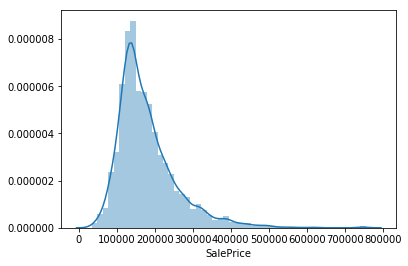

In [6]:
#histogram
sns.distplot(df['SalePrice']);

By plotting out the data, we can see that the data does not fit into the normal distribution, and skewed to the right. 

Now we create a new column called PricePerSquare which denotes the price per area. Since the living area is a factor that determine the toal price of the house, so we devide the sale price by above ground living area (GrLivArea) to get price per square feet.

In [7]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']

In [8]:
df['PricePerSquare'].describe()

count    2919.000000
mean      120.313742
std        30.452368
min        28.358738
25%        99.722094
50%       119.453608
75%       138.830698
max       276.250881
Name: PricePerSquare, dtype: float64

Then, we want to check if the data for PricePerSquare is normal.

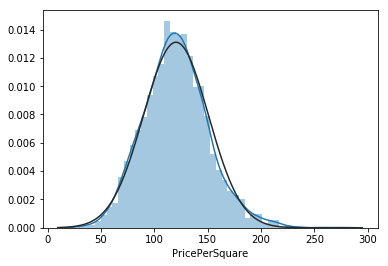

In [9]:
sns.distplot(df['PricePerSquare'], fit=norm);

From the plot we can see data fit into normal distribution really well.

**Data correlation**

At this point, we have no idea, how different feature is correlate with sale price. So we will use a correlation map to plot the data correlation.

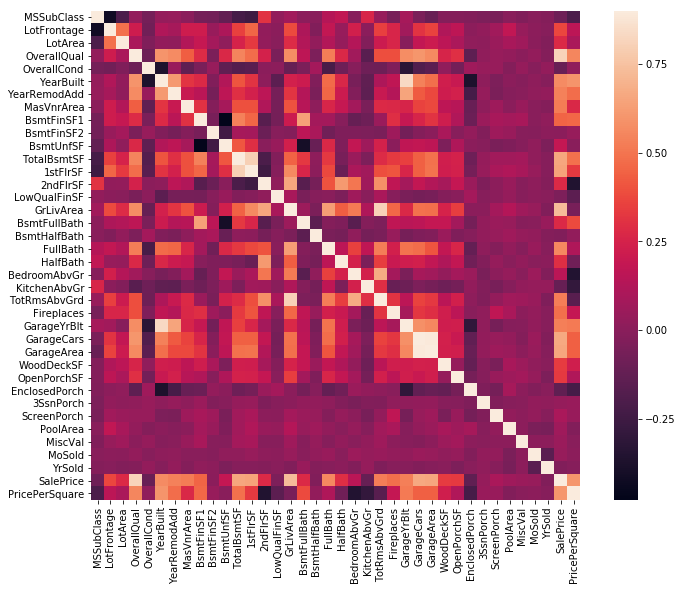

In [10]:
corr_map = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_map, vmax=0.9, square=True)


Here, light color indicates high correlation, and dark color indicates low correlation. We can ignore the  white diagonal line, because it's the correlation between the same variables, which must be 1. 

**Data cleaning**: For this part, we dropped columns such as landslope, roofstyle, because those columns are very detail features, not interpretable, or contain too much unspecified values. 

In [11]:
df = df[['YearBuilt', 'Neighborhood', 'SaleType', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'SalePrice', 'PricePerSquare']]

Then we will use a correlation map to plot the data correlation with features left.

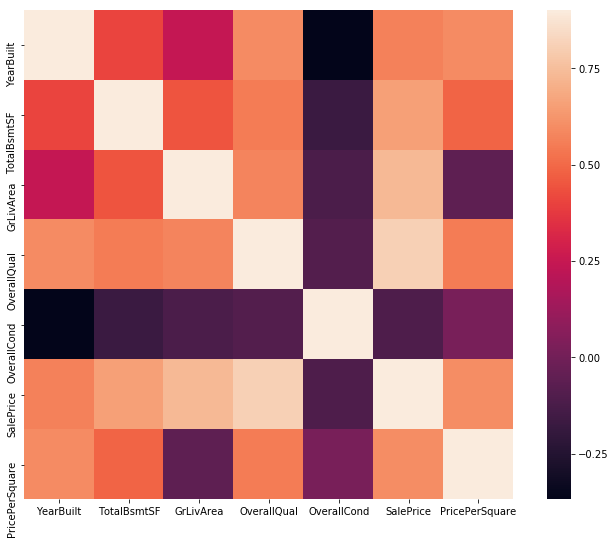

In [12]:
corr_map = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_map, vmax=0.9, square=True)

For the SalePrice, the OverallQual, GrLivArea, TotalBsmtSF, YearBuilt has relatively good correlation.  
For the PricePerSquare, For the SalePrice, the OverallQual,  TotalBsmtSF, YearBuilt has relatively good correlation. 

In [13]:
plt.rcParams["figure.figsize"] = [11, 11]

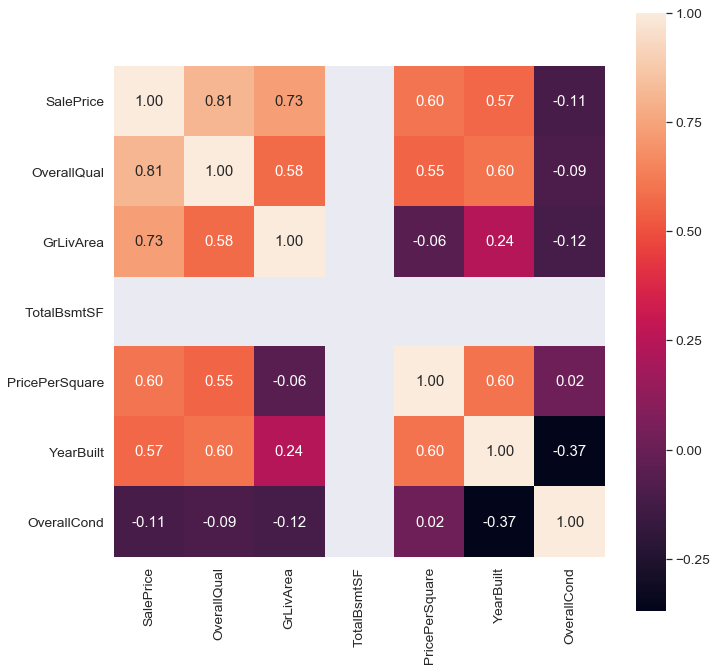

In [14]:
k = 7 #number of variables for correlation map
cols = corr_map.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the plot we can see **OverallQual, GrLivArea, TotalBsmtSF, YearBuilt** has the strongest correlation with **sale price**. We will now proceed with four features and do data analysis.

## Part 1 Analysis based on housing quality and price

Our goal here is to analyze whether housing quality has a strong correlation to housing prices. To do so, we use linear regression to plot a graph with housing quality and housing prices.

First, we want to know what is the distribution of overall quality in the housing market.

In [15]:
quality_tbl = df['OverallQual'].value_counts()
quality_tbl

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

<pre>
OverallQual: Rates the overall material and finish of the house

 10	Very Excellent
  9	Excellent
  8	Very Good
  7	Good
  6	Above Average
  5	Average
  4	Below Average
  3	Fair
  2	Poor
  1	Very Poor
</pre>

In [16]:
Labels=quality_tbl.keys()
Count=quality_tbl.tolist()

In [17]:
plt.rcParams["figure.figsize"] = [5, 5]

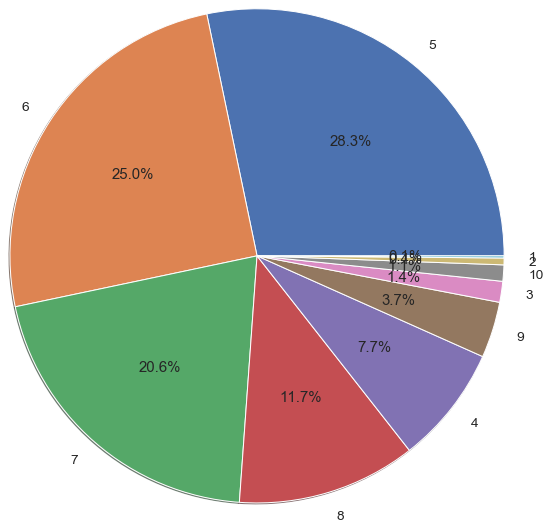

In [18]:
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(Count, labels=Labels, autopct='%1.1f%%', shadow=True,
radius = 5)
plt.show()

Then, we want to know what is the housing price for each quality.

We plot the price per squarefeet by quality because the quality of the house has the potential to influence the house price. Here we take the average sale price per square feet in each catagory of overall quality, and plot in the bar plot. From the bar plot, different quality did show different price per square feet. "**9 - Excellent**" has the highest average sale price, and "**2 - Poor**" has lowest average sale price. From the pie chart above, we can see that it's mostly quality with 5, 6, 7 in the market. 

In [19]:
plt.rcParams["figure.figsize"] = [15, 7]

(10, 230)

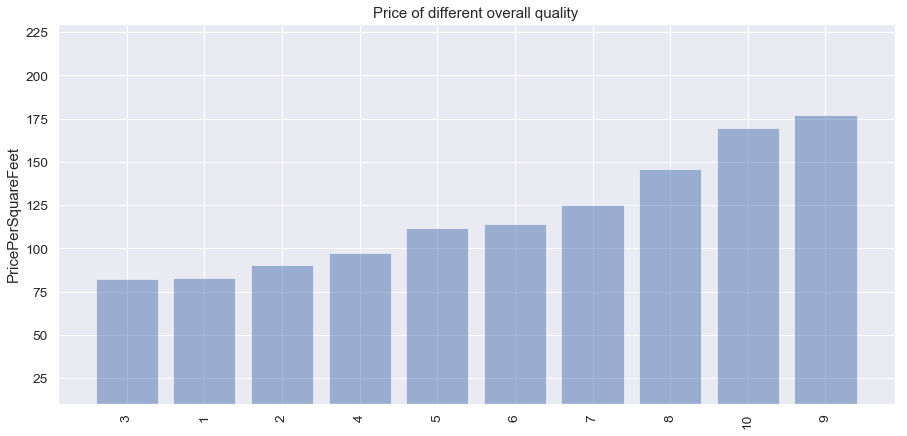

In [20]:
avg = []
x = df['OverallQual'].unique()
for type in df['OverallQual'].unique():
    avg.append(df[df['OverallQual'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different overall quality')
axes = plt.gca()
axes.set_ylim([10,230])

Here we can see, roughtly as the quality goes higher, the price per square feet goes higher. 

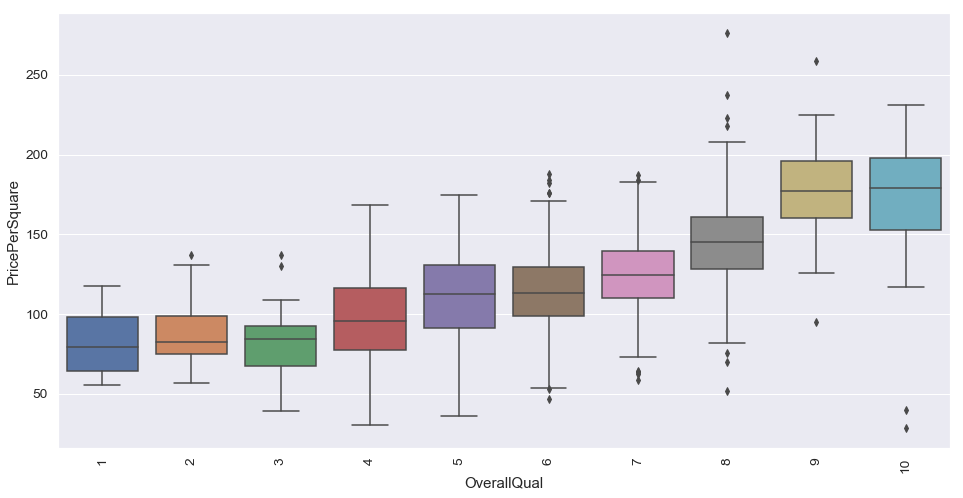

In [21]:
#box plot overallqual/price_per_square
f, ax = plt.subplots(figsize=(16,8))
data = df[['OverallQual', "PricePerSquare"]]
sns.boxplot(data=data, x="OverallQual", y="PricePerSquare")
plt.xticks(rotation=90);

The boxplot above also shows that as the quality goes higher, the price per square feet goes higher. 

In [22]:
outcome_1, predictors_1 = patsy.dmatrices('PricePerSquare ~ OverallQual', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         PricePerSquare   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1276.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):          3.43e-232
Time:                        19:15:59   Log-Likelihood:                -13583.
No. Observations:                2919   AIC:                         2.717e+04
Df Residuals:                    2917   BIC:                         2.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.7581      2.085     22.910      

#### We now show that housing quality has a some correlation to housing prices, but not very strong (R-square=0.304) The higher the overall quality the house has, the higher the housing price is.

## Part 2 Analysis based on sale style and price

Our goal here is to analyze which sale style predicts a higher price. To do so, we use linear regression to  plot a graph with sale style and housing prices.

First, we want to know what is the distribution of different sale type in the housing market.

In [23]:
saletype_tbl = df['SaleType'].value_counts()
saletype_tbl

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

<pre>
FIGURE: barplot of price per squarefeet by saletype Descrition of the saletype are provided below:
   WD     Warranty Deed - Conventional
   CWD    Warranty Deed - Cash
   VWD    Warranty Deed - VA(Veterans Affair) Loan
   New    Home just constructed and sold
   COD    Court Officer Deed/Estate
   Con    Contract 15% Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth    Other
</pre>

In [24]:
Labels=saletype_tbl.keys()
Count=saletype_tbl.tolist()

In [25]:
plt.rcParams["figure.figsize"] = [5, 5]

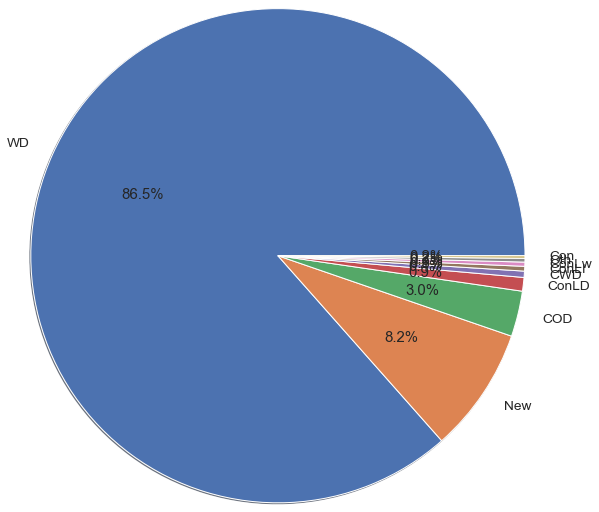

In [26]:
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(Count, labels=Labels, autopct='%1.1f%%', shadow=True,
radius = 5)
plt.show()

From the pie chart above, we can see that the most common sale type is warranity deed.  

Then, we want to know what is the housing price for each sale type.  

We plot the price per squarefeet by saletype because how the houses were sold has the potential to influence the house price. Here we take the average sale price per square feet in each catagory of saletype, and plot in the bar plot. From the bar plot, different saletype did show different price per square feet. "**Contract 15% Down payment regular terms**" has the highest average sale price, and "**COD (Contract 15% Down payment regular terms)**" has lowest average sale price. 

In [27]:
plt.rcParams["figure.figsize"] = [15, 7]

(80, 160)

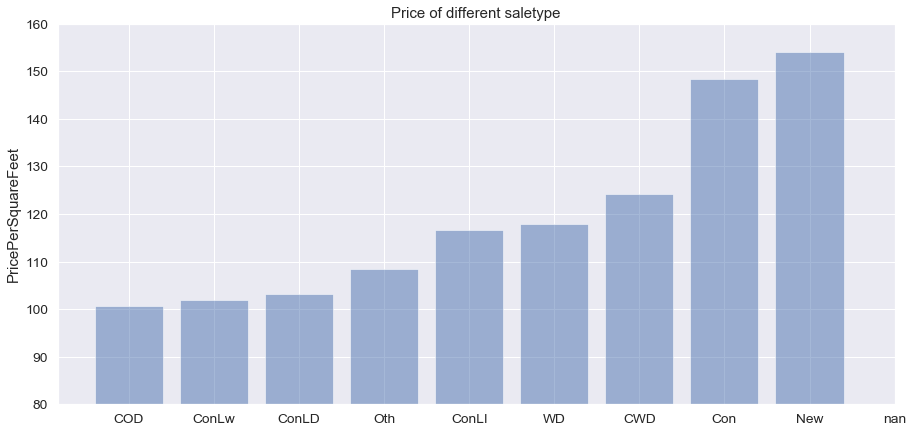

In [28]:
avg = []   
x = df['SaleType'].unique()
for type in df['SaleType'].unique():
    avg.append(df[df['SaleType'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different saletype')
axes = plt.gca()
axes.set_ylim([80,160])

In [29]:
outcome_1, predictors_1 = patsy.dmatrices('PricePerSquare ~ SaleType', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         PricePerSquare   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     51.49
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.21e-78
Time:                        19:16:02   Log-Likelihood:                -13916.
No. Observations:                2918   AIC:                         2.785e+04
Df Residuals:                    2909   BIC:                         2.790e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6130      3.06

#### We conclude that houses with new sale type usually has higher housing price.

## Part 3 Analysis based on neighborhood and price  
We want to see if different neighborhood will affect their housing price. We will use a histogram to plot the distribution between neighborhood and housing price.

First, we want to know what is the distribution of different neighborhood in the housing market.

In [30]:
neighbor_tbl = df['Neighborhood'].value_counts()
neighbor_tbl

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [31]:
Labels=neighbor_tbl.keys()
Count=neighbor_tbl.tolist()

In [32]:
plt.rcParams["figure.figsize"] = [5, 5]

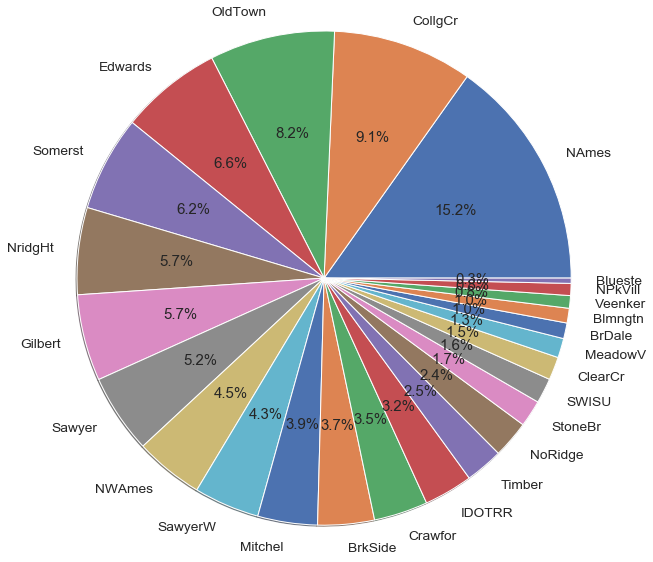

In [33]:
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(Count, labels=Labels, autopct='%1.1f%%', shadow=True,
radius = 5)
plt.show()

**Data clustering**

Is it true that the housing price is clustered by neighborhood?  
We will plot a scatter plot to check different neighborhood and their price vs. area

In [34]:
plt.rcParams["figure.figsize"] = [24, 12]

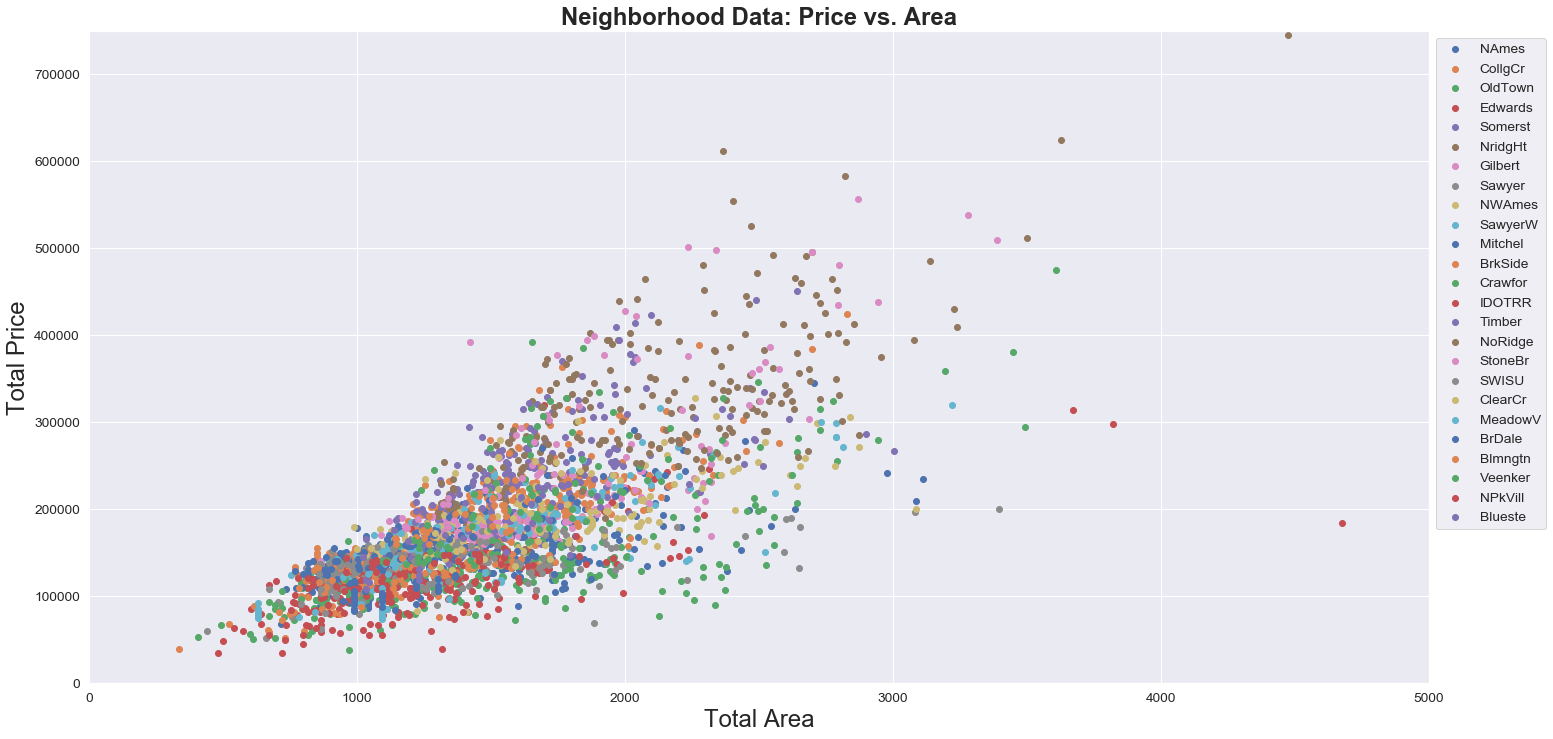

In [35]:
# Plot the data colour coded by neighbors
fig = plt.figure(1)
for label in range(len(Labels)):
    plt.scatter(np.array(df[df['Neighborhood']==Labels[label]]['GrLivArea']),np.array(df[df['Neighborhood']==Labels[label]]['SalePrice']) 
                , label=Labels[label])

# Add title, labels and legend
plt.title('Neighborhood Data: Price vs. Area', fontsize=24, fontweight='bold')
plt.xlabel('Total Area', fontsize=24);
plt.ylabel('Total Price', fontsize=24);
plt.xlim(0,  5000)
plt.ylim(0, 750000)
plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1,1));

From the plot, we have no information about specific information regarding neighborhood.  
We will plot the average instead.

We plot the total price by neighborhood because where the house is located has the potential influence to the house price. From the histogram, different neighborhood did show different total price. "NoRidge" has the highest average sale price, and "MeadowV " has lowest average sale price.

In [36]:
plt.rcParams["figure.figsize"] = [15, 7]

(0, 400000)

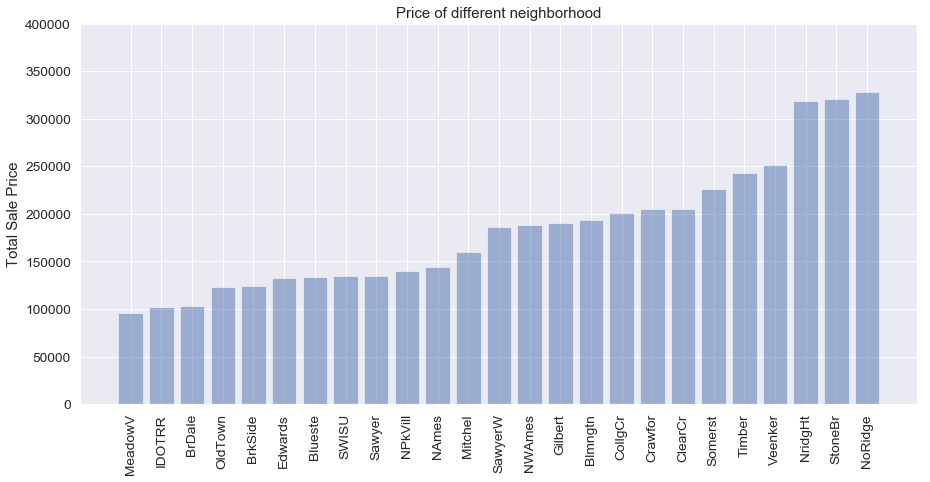

In [37]:
avg = []
x = df['Neighborhood'].unique()
for type in df['Neighborhood'].unique():
    avg.append(df[df['Neighborhood'] == type]['SalePrice'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))

plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('Total Sale Price')
plt.title('Price of different neighborhood')

axes = plt.gca()
axes.set_ylim([0, 400000])

We may also want to how the price per square is influenced by neighborhood because different neighborhood means different living atmosphere, which reflects a different price per square range. 
From the histogram, different neighborhood did show different total price. "NoRidge" has the highest average price per square, and "MeadowV" has lowest average price per square. Notice that, neighborhood has highest total price doesn't have highest price per square. Same also shown in the lowest price range.

(50, 180)

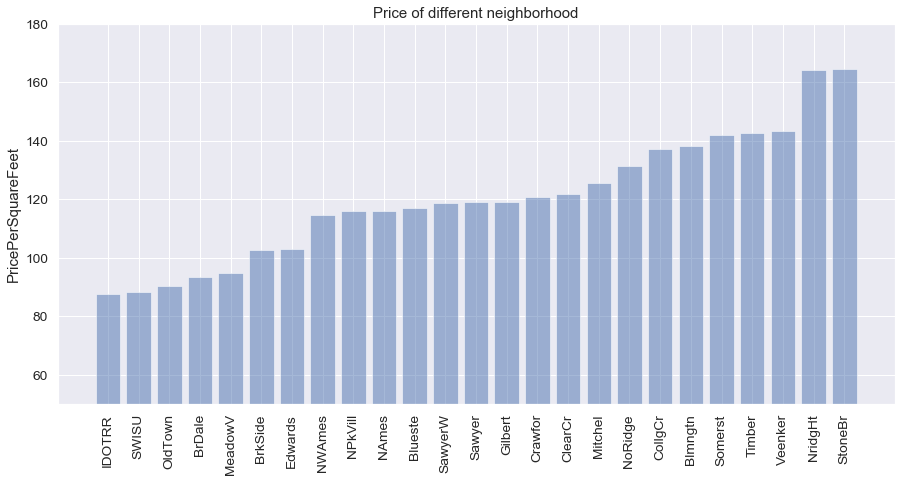

In [38]:
avg = []
x = df['Neighborhood'].unique()
for type in df['Neighborhood'].unique():
    avg.append(df[df['Neighborhood'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different neighborhood')
axes = plt.gca()
axes.set_ylim([50, 180])

#### We can conclude that different neighborhood has different housing price.

## Part 4 Analysis based on YearBuilt and price  
We want to see if different yearbuilt will affect their housing price. We will use a boxplot to plot the distribution between neighborhood and housing price.

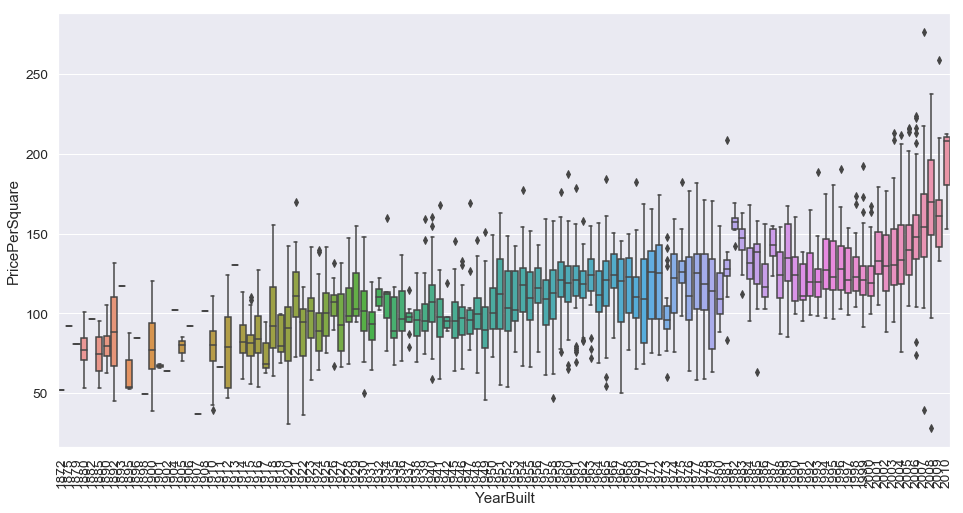

In [39]:
f, ax = plt.subplots(figsize=(16,8))
data = df[['YearBuilt', "PricePerSquare"]]
sns.boxplot(data=data, x="YearBuilt", y="PricePerSquare")
plt.xticks(rotation=90);

#### From the box plot above, we can see that later the house was built, newer the house is, and higher the housing price. 

## Part 5 Analysis based on living area and price  
We want to see if different living area will affect their housing price. We will use a linear regression to plot the correlation between living area and housing price.

In [40]:
df_LP = pd.DataFrame()
df_LP['price'] = df['SalePrice']
df_LP['area'] = df['GrLivArea'] 

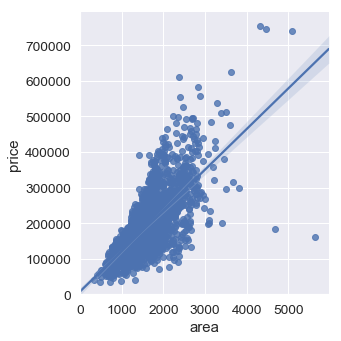

In [41]:
#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='area',y='price',data=df_LP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

We may want to drop outliers since as we see there are two bottom right points with large living area and low sale price. We can safely delete them.

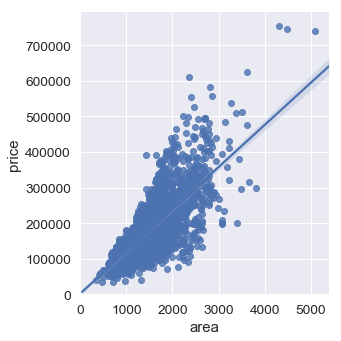

In [42]:
#Deleting outliers
df_LP = df_LP.drop(df_LP[(df_LP['area']>4000) & (df_LP['price']<300000)].index)

#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='area',y='price',data=df_LP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

In [43]:
#Create OLS regression analysis
outcome, predictors = patsy.dmatrices('price~area', df_LP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3673.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:16:26   Log-Likelihood:                -35837.
No. Observations:                2917   AIC:                         7.168e+04
Df Residuals:                    2915   BIC:                         7.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2307.2720   3083.406      0.748      0.4

####  Obvious though it is, now we conclude that more general living area means higher overall price. The common sense lies behind the screen is given by Total Price = Total area * PricePerSquare

## Part 6 Analysis based on basement area and price  
We want to see if different basement area will affect their housing price. We will use a linear regression to plot the correlation between basement area and housing price.

In [44]:
#Create linear regression
df_BP = pd.DataFrame()
df_BP['price'] = df['SalePrice']
df_BP['basement'] = df['TotalBsmtSF'] 

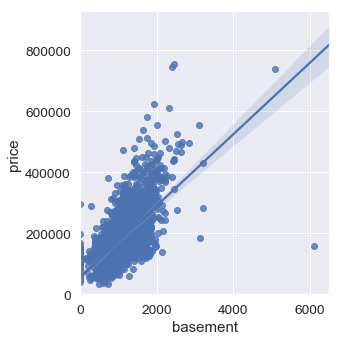

In [45]:
#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='basement',y='price',data=df_BP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

We may want to drop outliers since as we see there are one bottom right points with large basement area and low sale price. We can safely delete them.

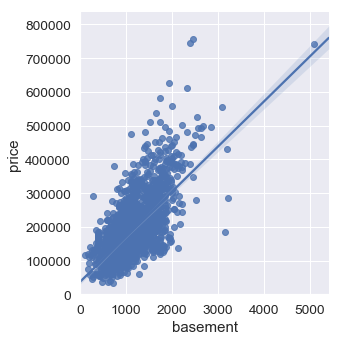

In [46]:
#Deleting no basement homes
df_BP = df_BP[df_BP['basement']>0]
#Deleting outliers
df_BP = df_BP.drop(df_BP[(df_BP['basement']>4000) & (df_BP['price']<300000)].index)

#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='basement',y='price',data=df_BP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

In [47]:
outcome, predictors = patsy.dmatrices('price~basement', df_BP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2412.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:16:28   Log-Likelihood:                -35159.
No. Observations:                2839   AIC:                         7.032e+04
Df Residuals:                    2837   BIC:                         7.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   3128.345     12.028      0.0

####  Besides general living area, we find that total basement area also have a positive linear relationship to housing price. However, there might be some hidden relationships, such as house with large living area will also have big basement.

### Part 7 Analysis based on overall condition and price
We already show that housing quality has a strong correlation to housing prices. It is also true that a higher housing condition predicts a higher housing price??

First, we want to know what is the distribution of overall condition in the housing market.

In [48]:
condition_tbl = df['OverallCond'].value_counts()
condition_tbl

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

<pre>
OverallCond: Rates the overall condition of the house

  10	Very Excellent
   9	Excellent
   8	Very Good
   7	Good
   6	Above Average	
   5	Average
   4	Below Average	
   3	Fair
   2	Poor
   1	Very Poor
</pre>

In [49]:
Labels=condition_tbl.keys()
Count=condition_tbl.tolist()

In [50]:
plt.rcParams["figure.figsize"] = [5, 5]

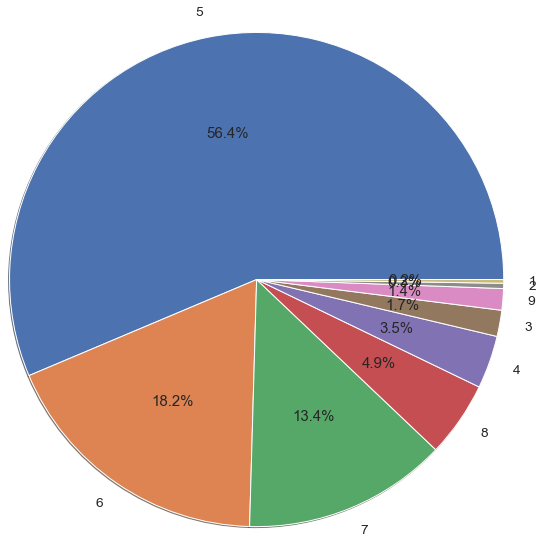

In [51]:
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(Count, labels=Labels, autopct='%1.1f%%', shadow=True,
radius = 5)
plt.show()

From above, we have a general ideal of the composition of the condition in housing market. 

Then, we want to know what is the housing price for each condition.

We plot the price per squarefeet by condition because the condition of the house has the potential influence to the house price. Here we take the average sale price per square feet in each catagory of overall condition, and plot in the bar plot. From the bar plot, different quality did show different price per square feet. "5 - Average" has the highest average sale price, and "1 - Very Poor" has lowest average sale price.

In [52]:
df_CP = pd.DataFrame()
df_CP['price'] = df['PricePerSquare']
df_CP['condition'] = df['OverallCond'] 
outcome, predictors = patsy.dmatrices('price~condition', df_CP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.312
Date:                Thu, 21 Mar 2019   Prob (F-statistic):              0.252
Time:                        19:16:28   Log-Likelihood:                -14113.
No. Observations:                2919   AIC:                         2.823e+04
Df Residuals:                    2917   BIC:                         2.824e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.0860      2.874     40.742      0.0

In [53]:
plt.rcParams["figure.figsize"] = [15, 7]

(10, 230)

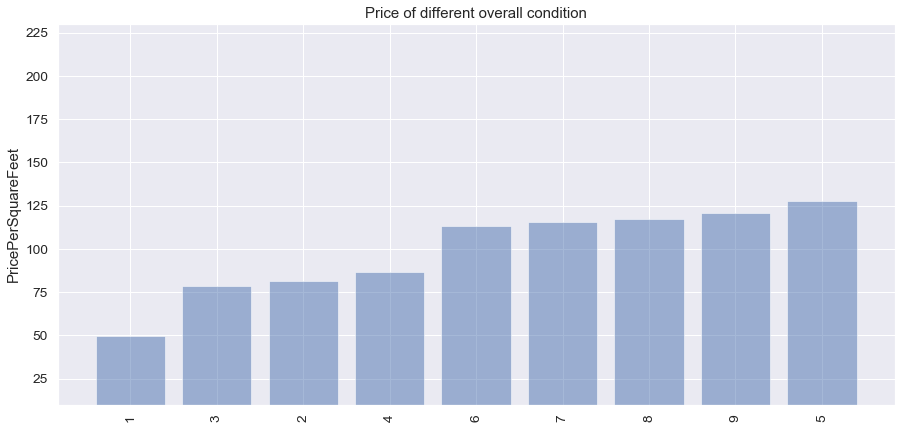

In [54]:
avg = []
x = df['OverallCond'].unique()
for type in df['OverallCond'].unique():
    avg.append(df[df['OverallCond'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different overall condition')
axes = plt.gca()
axes.set_ylim([10,230])

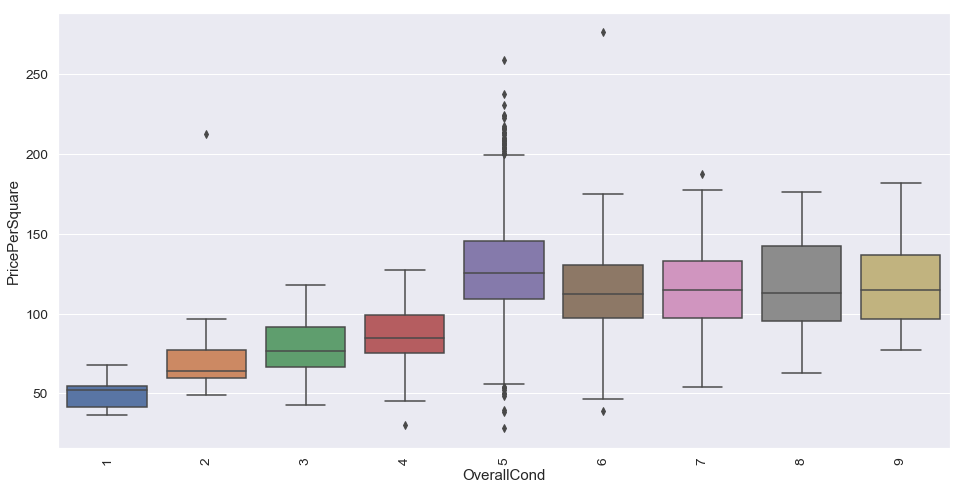

In [55]:
f, ax = plt.subplots(figsize=(16,8))
data = df[['OverallCond', "PricePerSquare"]]
sns.boxplot(data=data, x="OverallCond", y="PricePerSquare")
plt.xticks(rotation=90);

#### This is beyond our expectation, as we think a higher condition means a higher housing price. However, our data shows that the highest price comes from median overall condition. So there is no relationship with overall condition with the housing price.

### Part 8 Combined features

We have explored all features most correlated with sale price.   
How about features haven't analyze yet?

In [56]:
from sklearn.decomposition import PCA

We will only use continuous variable, so we pick **TotalBsmtSF, GrLivArea, PricePerSquare**

In [57]:
df1 = df.copy(deep=True)
df1 = df1[['TotalBsmtSF', 'GrLivArea', 'PricePerSquare']]
df1['TotalBsmtSF'] = df1[df1['TotalBsmtSF']>0]
df1.dropna(subset=['TotalBsmtSF', 'GrLivArea', 'PricePerSquare'], inplace=True)

In [58]:
df1

,TotalBsmtSF,GrLivArea,PricePerSquare
Id,,,
1,856.0,1710,121.929825
2,1262.0,1262,143.819334
3,920.0,1786,125.139978
4,756.0,1717,81.537566
5,1145.0,2198,113.739763
6,796.0,1362,104.992658
7,1686.0,1694,181.227863
8,1107.0,2090,95.693780
9,952.0,1774,73.224352


#### K-means

we initialize a kmeans object for 2 clustering

First we do a clustering for **TotalBsmtSF** vs **PricePerSquare**

In [59]:
d1 = df1['TotalBsmtSF'].values
d2 = df1['GrLivArea'].values
d3 = df1['PricePerSquare'].values

In [60]:
km = KMeans(n_clusters=3, random_state=42)

In [61]:
cl_dat = np.array([d1, d3]).T

In [62]:
cl_dat

array([[ 856.        ,  121.92982456],
       [1262.        ,  143.81933439],
       [ 920.        ,  125.1399776 ],
       ...,
       [1224.        ,  136.71405229],
       [ 912.        ,  119.45360825],
       [ 996.        ,  111.261     ]])

In [63]:
kmeans=km.fit(cl_dat)

In [64]:
kmeans.cluster_centers_

array([[1170.36562203,  122.84245709],
       [ 755.67078825,  109.99436862],
       [1742.09736308,  147.70335537]])

Text(0, 0.5, 'PricePerSqaureFeet')

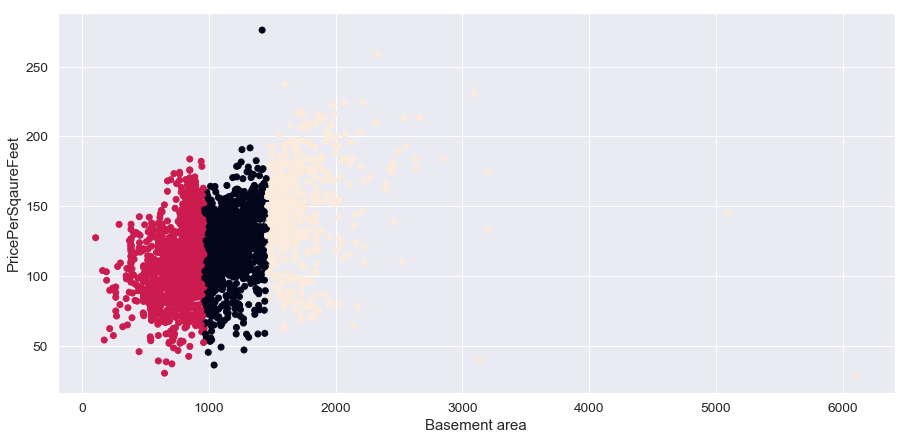

In [65]:
plt.scatter(d1, d3, c=km.labels_);
plt.xlabel('Basement area');
plt.ylabel('PricePerSqaureFeet')

Based on the Kmeans model, we can clearly cluster the data point to three clusters with centroid value (1170.3656,122.8425) ,  (755.6708,109.9944) ,(1742.0974,147.7034), so if we were to have another point, and we use a Kmeans model to predict which cluster the point belongs to, the expcted values is the centroid of the corresponding cluster. Also, from the Kmeans, we see that the intrinsic data structure is not random at all. Data point can be classfied to certain groups. 

Then we do a clustering for **GrLivArea** vs **PricePerSquare**

In [66]:
km2 = KMeans(n_clusters=4, random_state=42)

In [67]:
cl_dat = np.array([d2, d3]).T

In [68]:
kmeans2=km2.fit(cl_dat)

In [69]:
kmeans2.cluster_centers_

array([[ 982.1546894 ,  124.86868137],
       [1833.45169713,  120.26532752],
       [2606.8458498 ,  119.45903676],
       [1405.767     ,  119.64000992]])

Text(0, 0.5, 'PricePerSqaureFeet')

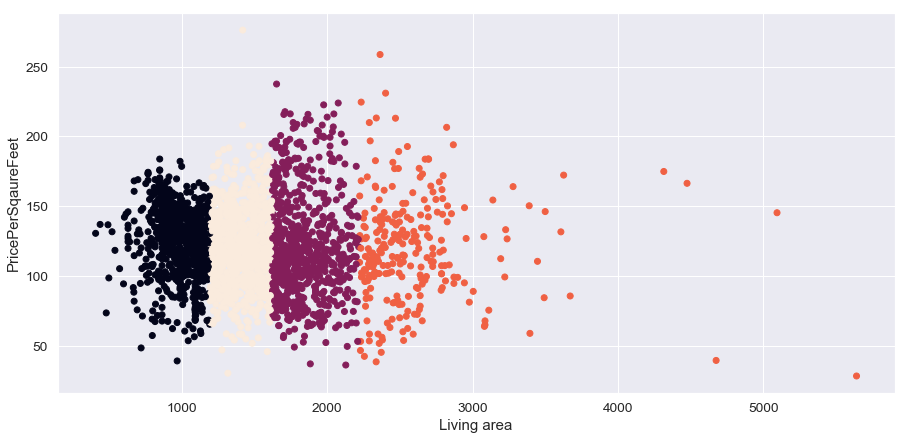

In [70]:
plt.scatter(d2, d3, c=km2.labels_);
plt.xlabel('Living area');
plt.ylabel('PricePerSqaureFeet')

Based on the Kmeans model, we can clearly cluster the data point to four clusters with centroid value (982.1547 ,  124.868),(1833.4517,  120.2653),(2606.8458 ,  119.4590),(1405.767,  119.6400), so if we were to have another point, and we use a Kmeans model to predict which cluster the point belongs to, the expcted values is the centroid of the corresponding cluster. Also, from the Kmeans, we see that the intrinsic data structure is not random at all. Data point can be classfied to certain groups. 

This data seems to fit really well in K-Means.  

However, we want to know more about the relationship between **TotalBsmtSF, GrLivArea **vs **PricePerSquare**

#### Dimensionality reduction and PCA
First, we do a PCA on **TotalBsmtSF**vs **PricePerSquare**

#### whiten the data

For both d1, d2, d3 (separately) we use the whiten function to whiten the data and save the outputs to d1w, d2w, d3w repectively.

In [71]:
d1w = whiten(d1)
d2w = whiten(d2)
d3w = whiten(d3)

For PCA,we have to standardize all the variables. If we were not standardize all the variables, the variables will have unequal unit, so some variables may have much higher weight unprinciple component, but in reality, they're not that important. Thus, unstandized PCA is unreasonable. 

In [72]:
dr = PCA(n_components=1, whiten=True)

In [73]:
dr_dat1 = np.array([d1, d3]).T

In [74]:
out = dr.fit_transform(dr_dat1)

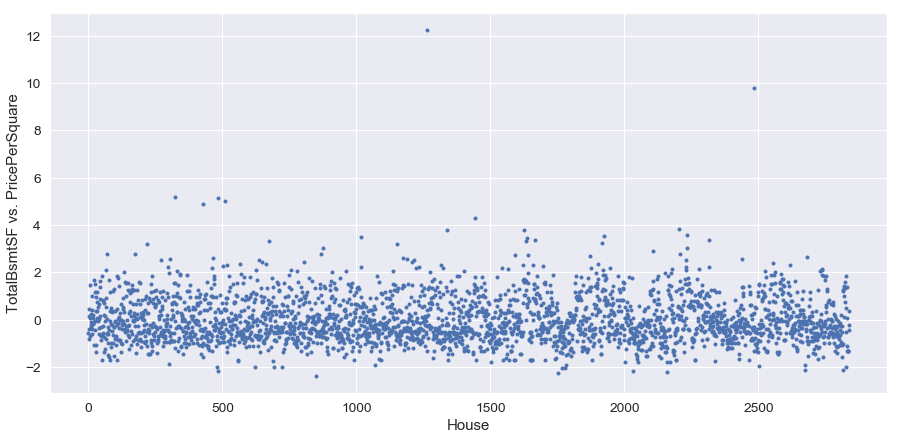

In [75]:
plt.plot(out, '.');
plt.xlabel('House');
plt.ylabel('TotalBsmtSF vs. PricePerSquare');

From the plot, we see this data is now 1D, the x-axis is the index number of house. Now, for each house, we have a (whitened) single number representing combined TotalBsmtSF & PricePerSquare.

Then, we do a PCA on **GrLivArea** vs **PricePerSquare**

In [76]:
dr_dat2 = np.array([d2, d3]).T

In [77]:
out = dr.fit_transform(dr_dat2)

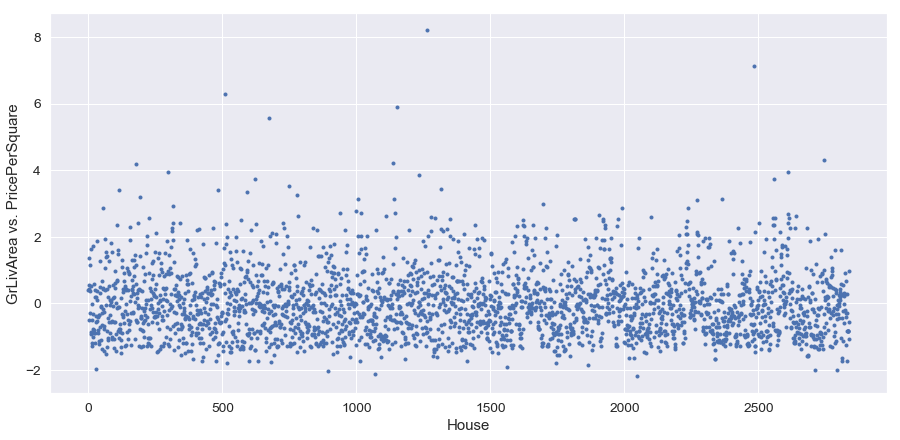

In [78]:
plt.plot(out, '.');
plt.xlabel('House');
plt.ylabel('GrLivArea vs. PricePerSquare');

From the plot, we see this data is now 1D, the x-axis is the index number of house. Now, for each house, we have a (whitened) single number representing combined GrLiveArea & PricePerSquare.

### Discussion

After a close inspection of our project, we conclude that our major analyses and hypotheses are correct, i.e., different house styles affect people’s willingness to pay and the higher the overall quality, the higher the housing price is. The major contribution of this project is our model will show users several factors they will need to consider before they look for a house. Construction companies can also benefit from our analyses since they could spend money improving factors that customers value the most and less on factors that are costly but inessential.  

However, if it seems that we are unable to determine factors that largely influence the house prices, we would look for do some research to see some other possible factors.Then we will try to find datasets that we could use to check whether or not those new factors contribute greatly to the house prices. In fact, determining housing prices is difficult since it needs to take plenty of factors into consideration, and thus there are still many more factors affecting housing prices that are not included in our analyses. Besides, there are potential pitfalls of our data: first, the dataset only contains 2919 variables. As a result, we don’t have enough instances of the house for our analysis. Second, the dataset doesn’t scale outside the city of Ames, Iowa. As a result, we restrict our analysis and may subject to bias. In conclusion, although the dataset provides buyer some insight about the housing price, it is still far from enough to find a full-fledged housing formula for house buyers.

### Final Conclusion

Our analysis shows that various factors could have influenced the housing price, mainly by its overall quality, general living area, total basement area, and year built.

First, we find that the higher **overall quality** the house have, the higher the housing price is going to be.

Next, Related to the **sale type** of a house. We find out that new house is more preferred, and they reflects a higher price.

Then, there is a strong positive association between **living area** and the overall price of a house. Analysis of data shows that, the more living area the house have, the higher the housing price is. This is fairly obvious, as more living area usually means more production cost, more material, and more landarea. Those factors will be counted when the house is sold, which should increase the price. Moreover, we also find there is a strong positive correlation between **basement area** and the overall price of a house. A general anaylysis on the data shows that more basement area also counts in living area, which pushes the housing price to a higher range.

On the other hand, when we take the year when the houses are built into consideration. We find a positive correlation between **year built** and house price. For example, the houses built in 2010 is average 200 dollars per square, which is over 125 dollars more expensive than their counter part in 1900s. This gives us the conclusion that the later the house was built, newer the house is, and higher the housing price.

Last but not the least, things we thought to have a strong influence in the housing price like the overall condition of the house, don't prove to have significant correlation with the price of the house. Specifically, the high condition houses only predict a median housing price, while, the median condition houses are more preferred. 

In conclusion, many factors can influence the housing price. From our analysis, house seeker has gotten a general view on how the price of the house is determined. Certainly, more analysis is needed to be done on larger population, to find out what are the factors to housing price out of certain area, and certain house seekers.
There are also some missing variables we have not included in our consideration. For example, people's average age
is not considered. Just think about youngsters should prefer newer houses than elders, which reflects the different preference in two types of houses. However, no matter these factors are omitted or not, those accurate and useful information we provided from the public datasets of housing price may change people's opinion when they decide to get a house.